# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
import numpy as np

def apply_svd_custom(X_train, X_test, n_components):
   
    cov_matrix = np.dot(X_train.T, X_train)

    
    values, vectors = np.linalg.eigh(cov_matrix)

    order_indices = np.argsort(values)[::-1]

    top_vectors = vectors[:, order_indices[:n_components]]

    X_train_reduced = np.dot(X_train, top_vectors)
    X_test_reduced = np.dot(X_test, top_vectors)

    return X_train_reduced, X_test_reduced, vectors


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [23]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_logistic_regression(X_train, y_train, X_test, y_test):

    start_time = time.time()

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    training_time = time.time() - start_time

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time

svd_components = [50, 100, 200, 300, 400, 500, 600, 700, 784]  

final_results = []

print("Training models with different levels of SVD preprocessing...")
for num_features in svd_components:
    print(f"Applying custom SVD with {num_features} components...")

    X_train_svd, X_test_svd, right_singular_vectors = apply_svd_custom(X_train, X_test, num_features)

    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    final_results.append({
        'n_components': num_features,
        'accuracy': accuracy,
        'training_time': training_time,
        'right_singular_vectors': right_singular_vectors
    })

    print(f"SVD components: {num_features}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9087, Training time: 8.9145 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9179, Training time: 13.0624 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9207, Training time: 25.1511 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9203, Training time: 39.6366 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9196, Training time: 56.7443 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 74.6943 seconds
Applying custom SVD with 600 components...
SVD components: 600, Accuracy: 0.9206, Training time: 86.7529 seconds
Applying custom SVD with 700 components...
SVD components: 700, Accuracy: 0.9206, Training time: 110.5718 seconds
Applying custom SVD with 784 compone

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


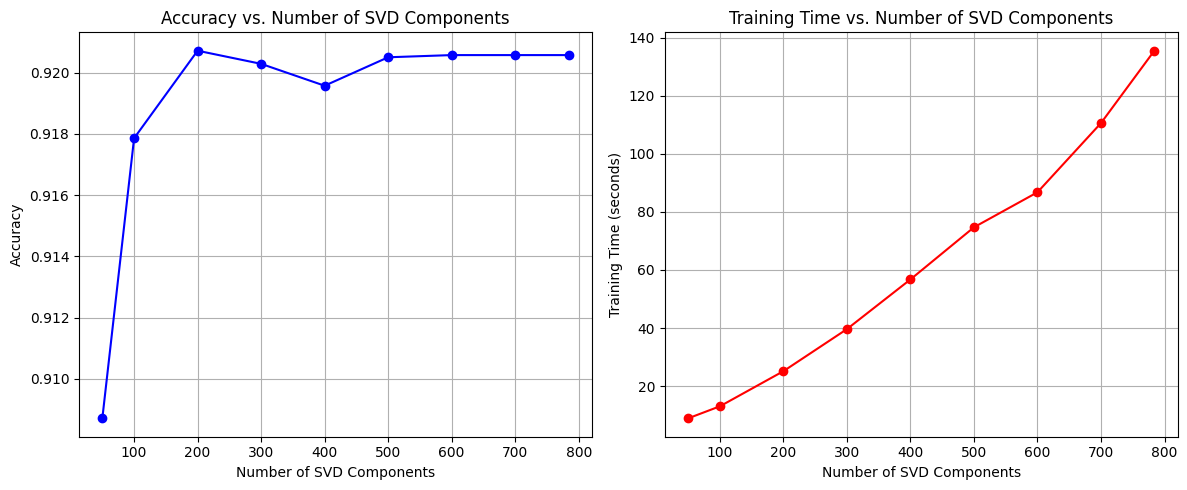

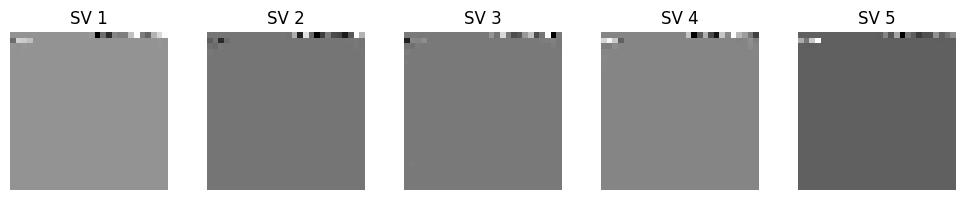

In [24]:
import numpy as np
import matplotlib.pyplot as plt

components = [result['n_components'] for result in final_results]
accuracy = [result['accuracy'] for result in final_results]
training_time = [result['training_time'] for result in final_results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracy, marker='o', color='b', label='Accuracy')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(components, training_time, marker='o', color='r', label='Training Time (seconds)')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of SVD Components')
plt.grid(True)

plt.tight_layout()
plt.show()

top_singular_vectors = top_result['right_singular_vectors'].T[:5]  

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    singular_vector_image = top_singular_vectors[i].reshape(28, 28)
    plt.imshow(singular_vector_image, cmap='gray')
    plt.title(f'SV {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [ ]:
# I noticed that as the number of SVD components increased, so did the accuracy. The accuracy improved consistently as the number of SVD components increased,
# up until 500 components. After 500 SVD components, the accuracy stabilized at 92.06%. The peak accuracy was achieved with 200 SVD components, where it
# reached 92.07%. There was however a slight drop in accuracy at 400 SVD components, where it decreased by 0.07% when comparedto 300 components.
# The most significant increase in accuracy occurred when the number of components increased from 50 to 100. However, as the number of SVD components
# increased, the training time also grew in a linear manner. This indicates that while more components may slightly improve accuracy, they also
# significantly increase training time, reducing time efficiency. In order to  strike the best balance between accuracy and training time,
# it is optimal to use around 200 SVD components. This provides the best accuracy while keeping the training time relatively low.